# Размер выборки n = 100

# Пороговые значения для k = 0.00001, для b = 0.0001

# Шаг $\varepsilon$ = 0.01, от 0.5 до 1.0

In [16]:
import numpy as np
from src.sensitivity import getsensitivity
from src.people_dataset import PeopleDataset

In [17]:
# Создание объекта класса PeopleDataset
dataset = PeopleDataset(100)

# Генерация данных
dataset.generate_data()
print("coefs are = ", dataset.get_coefficients())

coefs are =  (0.47045507592494124, 1.1983036266137503)


In [18]:
k_sens, b_sens = getsensitivity(dataset.X, dataset.y)

Max delta k: 0.02
Max delta b: 4.21
True k: 0.47
True b: 1.20


In [19]:
# будет определено также отдельным файлом, не в блокноте, пока для удобства
def laplace_mech(dataset, epsilon, k_sens, b_sens):
    k_true, b_true = dataset.get_coefficients()
    k_noise = np.random.laplace(loc = 0, scale = k_sens / epsilon, size = 1)
    b_noise = np.random.laplace(loc = 0, scale = b_sens / epsilon, size = 1)
    return k_true + k_noise, b_true + b_noise

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def compare_steps(dataset, k_sens, b_sens, epsilon_start, epsilon_end, epsilon_step, k_threshold, b_threshold):
    epsilon_values = np.arange(epsilon_start, epsilon_end, epsilon_step)
    k_true, b_true = dataset.get_coefficients()
    results = []

    for epsilon in epsilon_values:
        print("epsilon = ", epsilon)
        k_mean = 0
        b_mean = 0
        k_diff = float('inf')
        b_diff = float('inf')
        step_count = 0
        k_means = []
        b_means = []

        while k_diff > k_threshold or b_diff > b_threshold:
            k_tild, b_tild = laplace_mech(dataset, epsilon, k_sens, b_sens)

            k_mean = (k_mean * step_count + k_tild) / (step_count + 1)
            b_mean = (b_mean * step_count + b_tild) / (step_count + 1)

            k_diff = np.abs(k_mean - k_true)
            b_diff = np.abs(b_mean - b_true)

            step_count += 1
            k_means.append(k_mean)
            b_means.append(b_mean)

            if step_count >= 50000: # если за 50к шагов не получили, что хотели, то выходим
                print("Атака не удалась")
                break

        results.append((epsilon, step_count, k_means, b_means))

    return results



epsilon =  0.5
Атака не удалась
epsilon =  0.51
Атака не удалась
epsilon =  0.52
Атака не удалась
epsilon =  0.53
Атака не удалась
epsilon =  0.54
Атака не удалась
epsilon =  0.55
Атака не удалась
epsilon =  0.56
Атака не удалась
epsilon =  0.5700000000000001
Атака не удалась
epsilon =  0.5800000000000001
epsilon =  0.5900000000000001
Атака не удалась
epsilon =  0.6000000000000001
epsilon =  0.6100000000000001
Атака не удалась
epsilon =  0.6200000000000001
Атака не удалась
epsilon =  0.6300000000000001
Атака не удалась
epsilon =  0.6400000000000001
Атака не удалась
epsilon =  0.6500000000000001
Атака не удалась
epsilon =  0.6600000000000001
Атака не удалась
epsilon =  0.6700000000000002
Атака не удалась
epsilon =  0.6800000000000002
Атака не удалась
epsilon =  0.6900000000000002
Атака не удалась
epsilon =  0.7000000000000002
epsilon =  0.7100000000000002
Атака не удалась
epsilon =  0.7200000000000002
Атака не удалась
epsilon =  0.7300000000000002
Атака не удалась
epsilon =  0.740000000

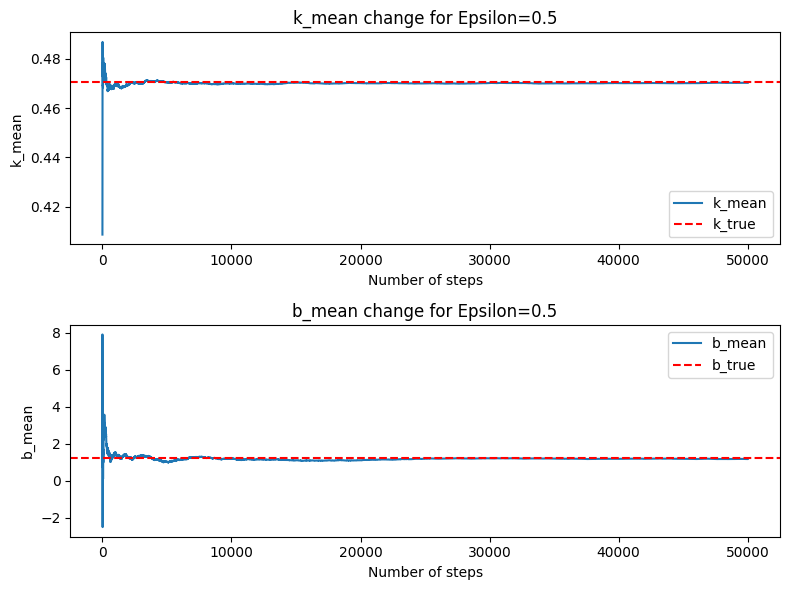

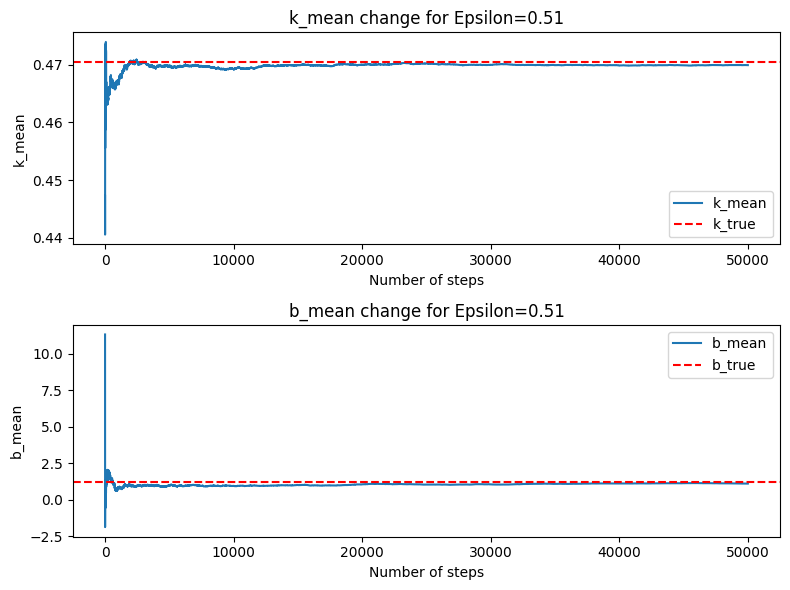

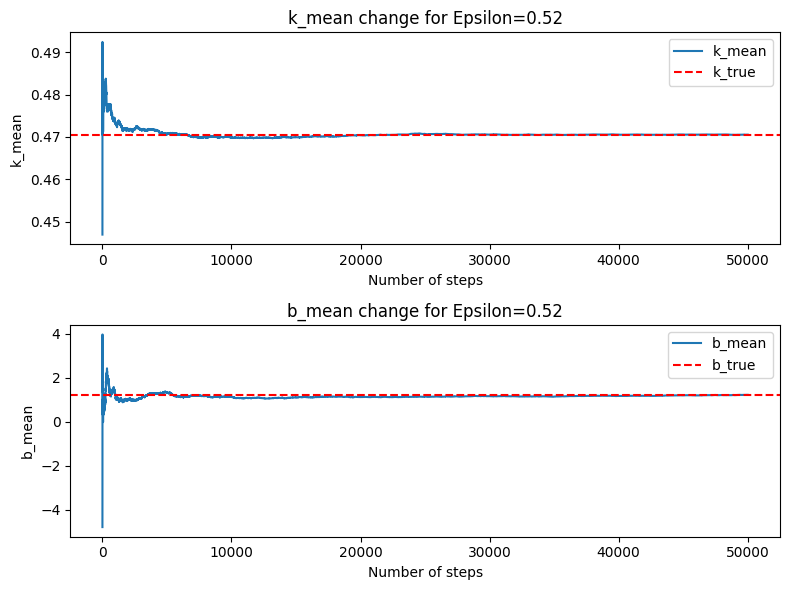

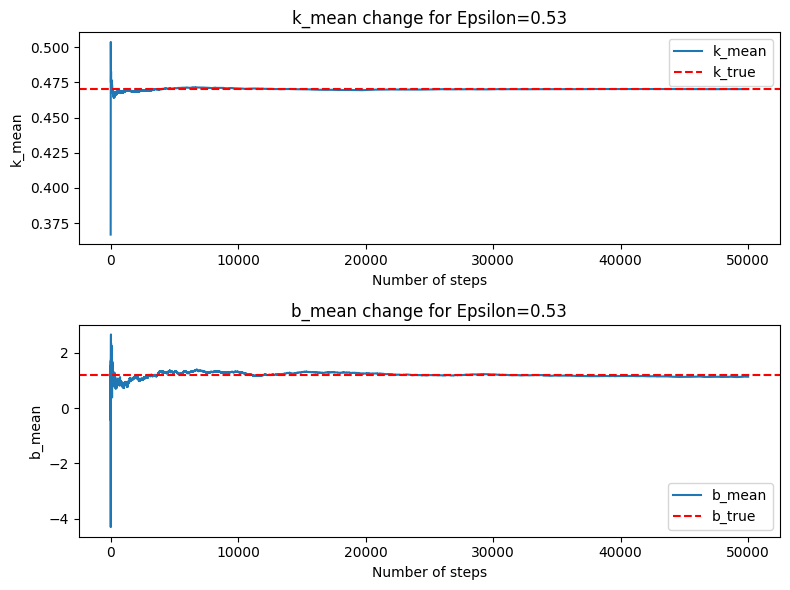

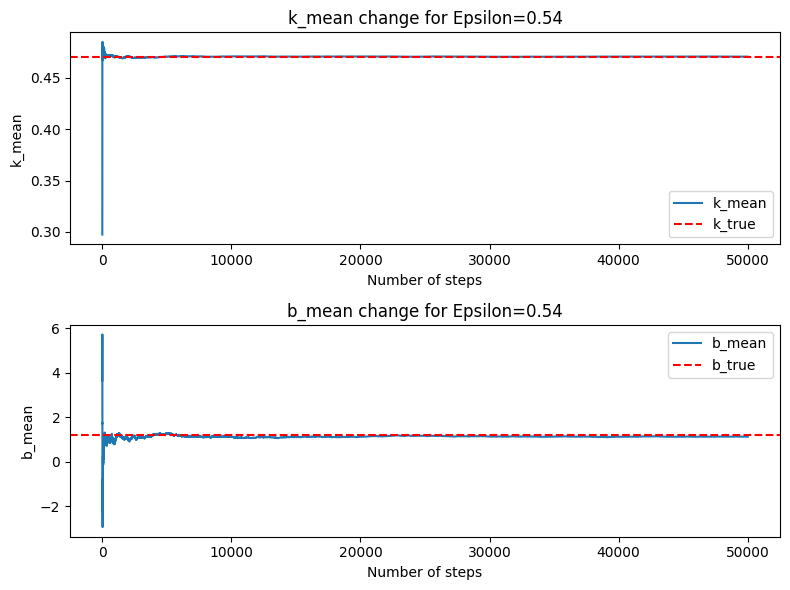

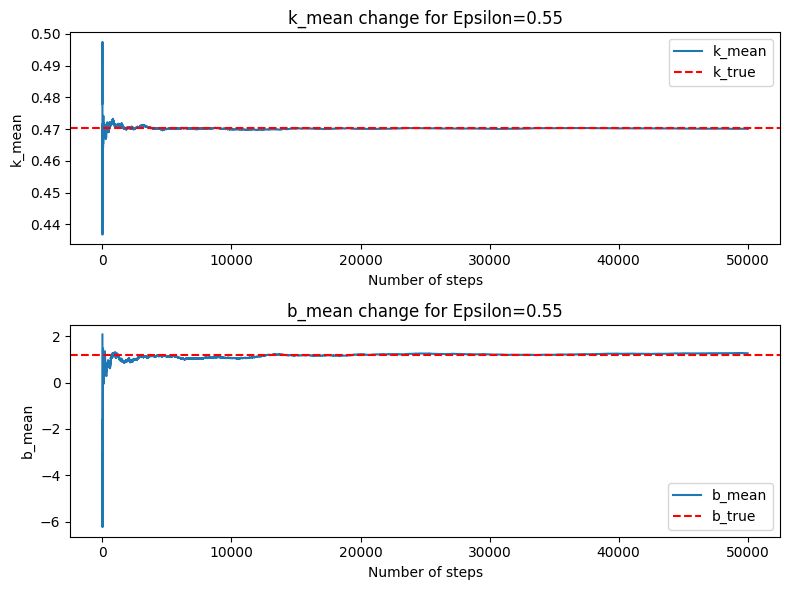

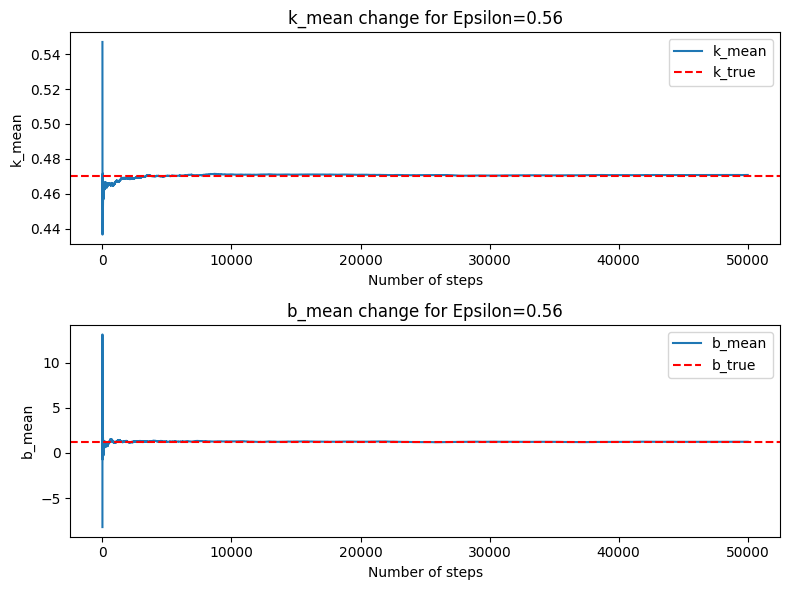

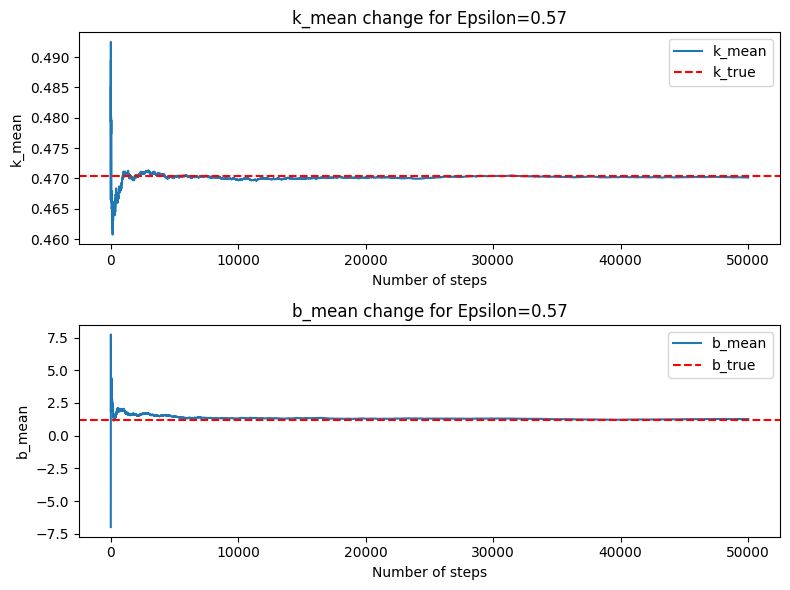

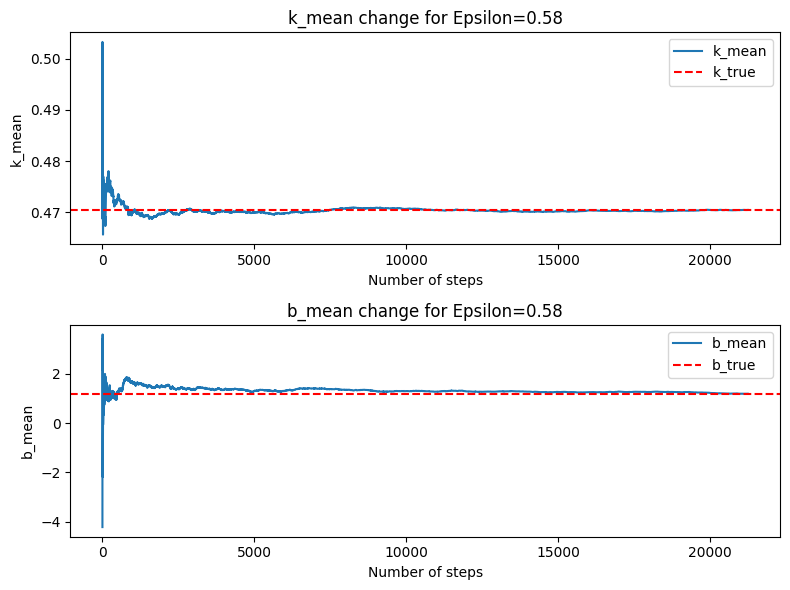

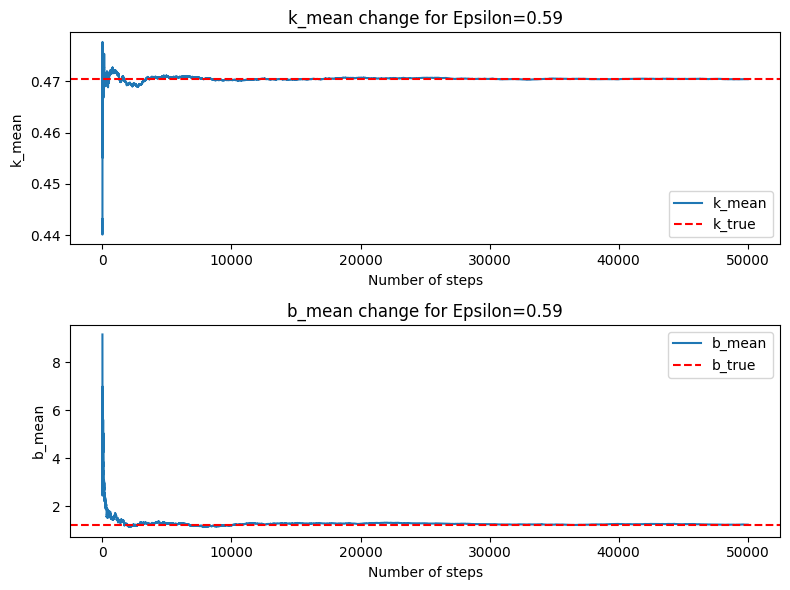

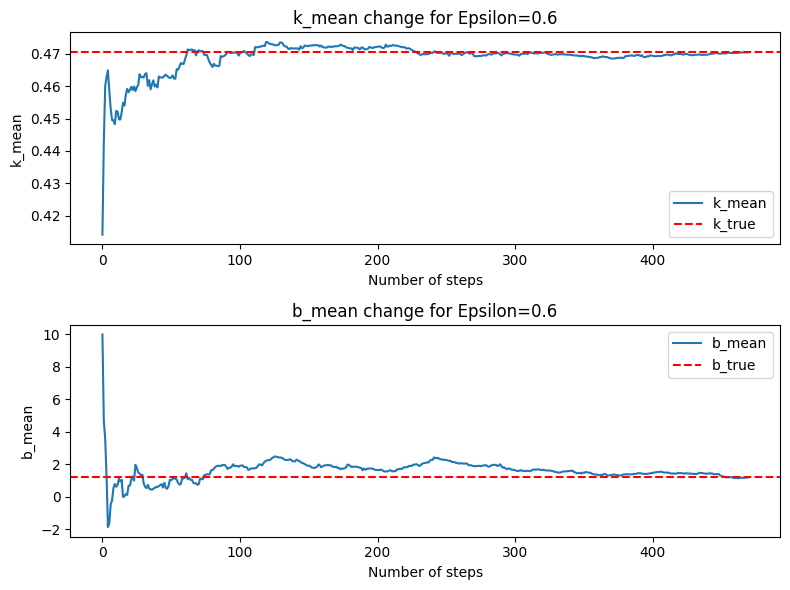

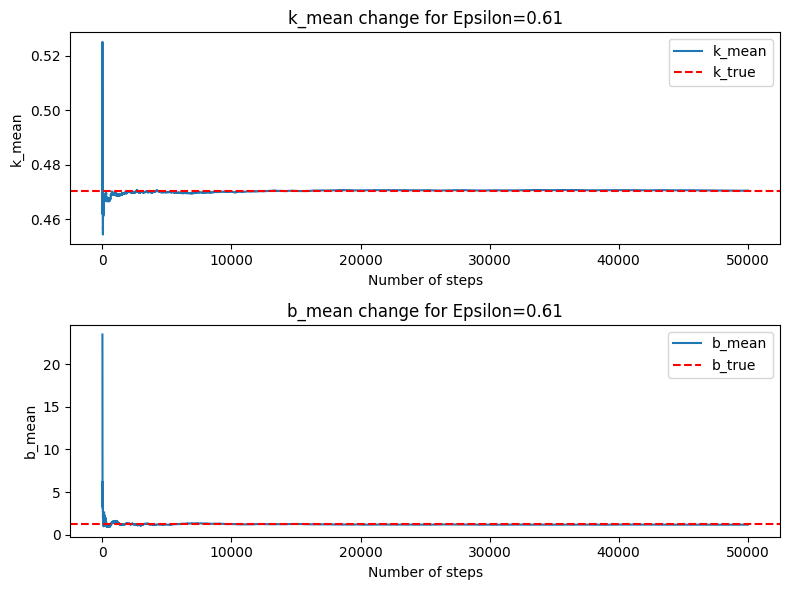

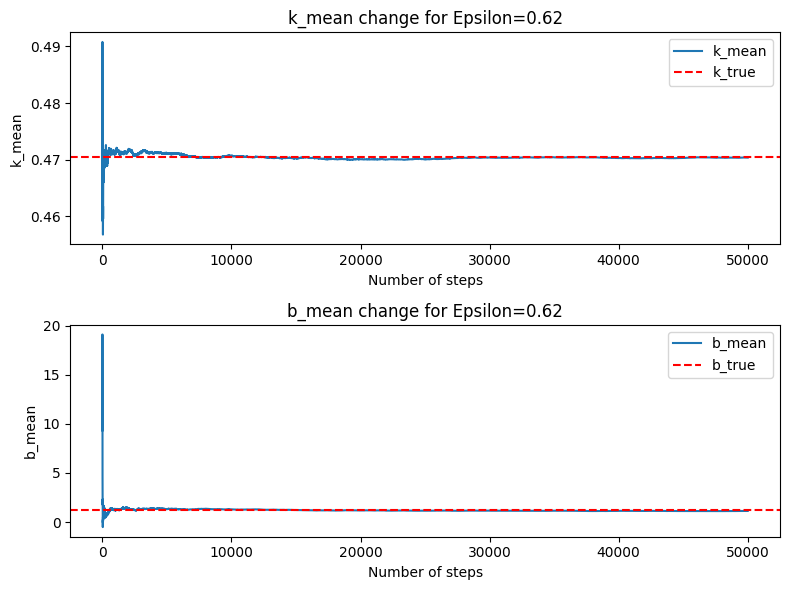

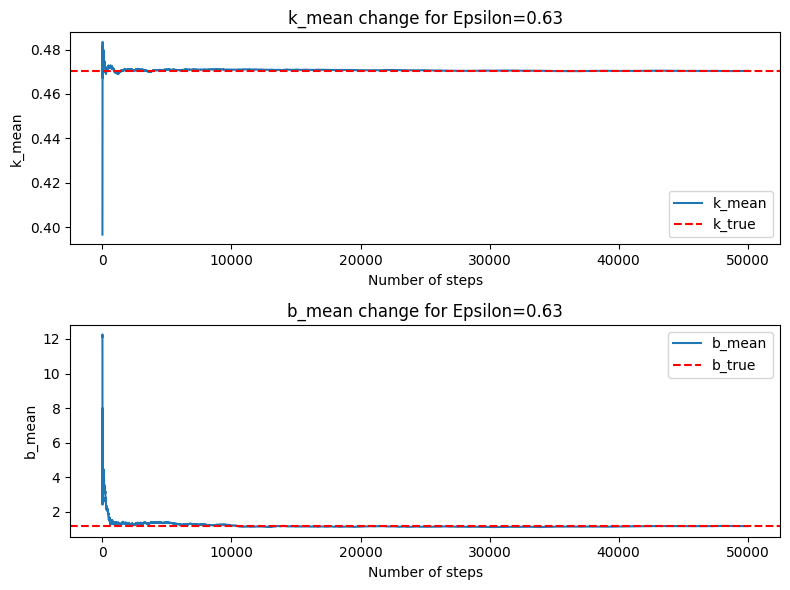

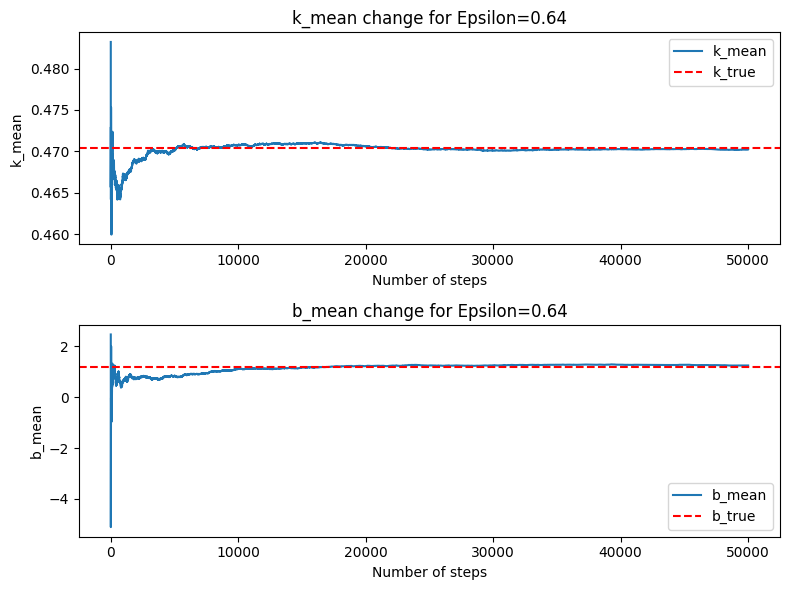

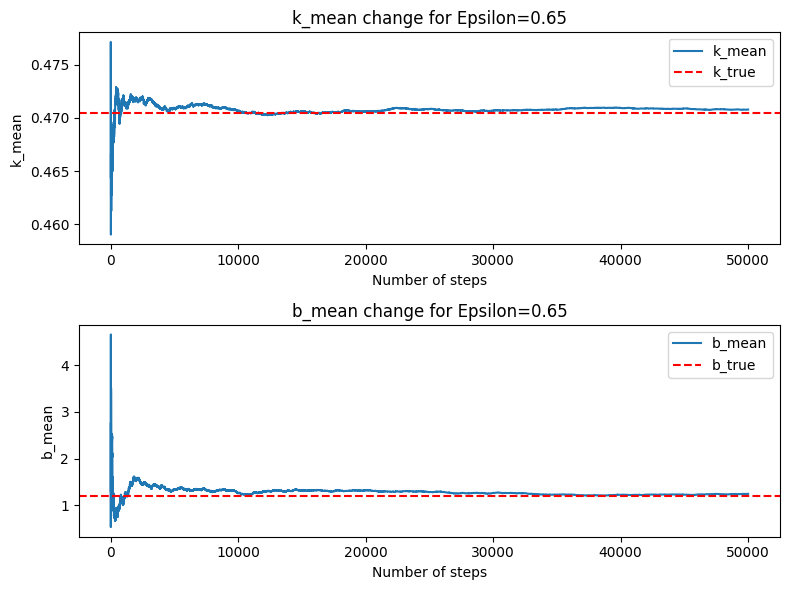

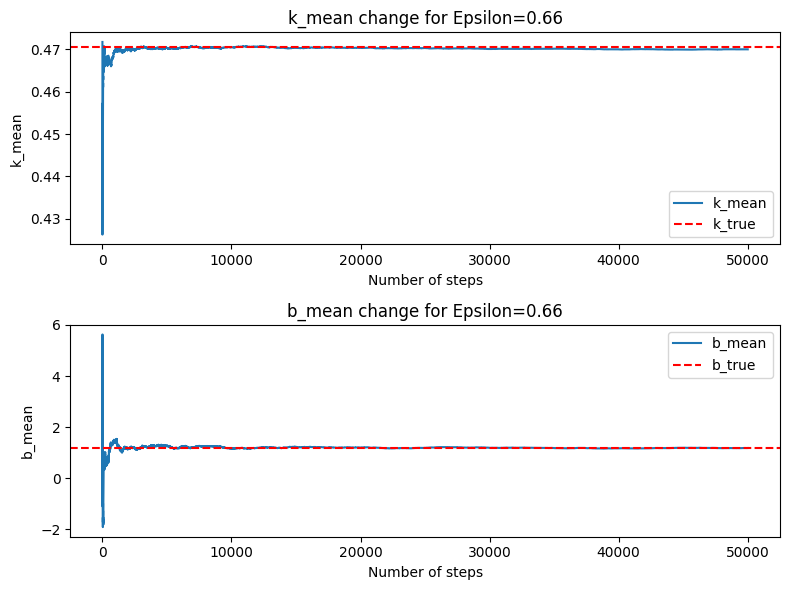

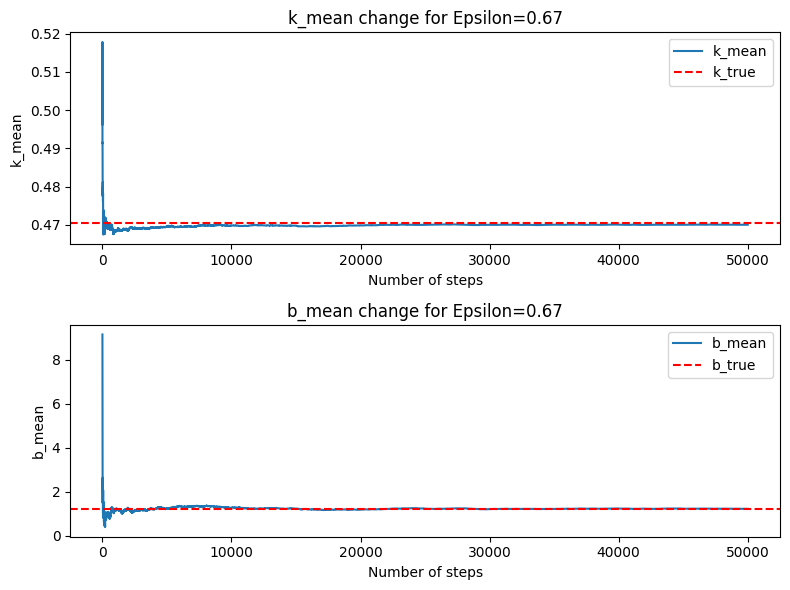

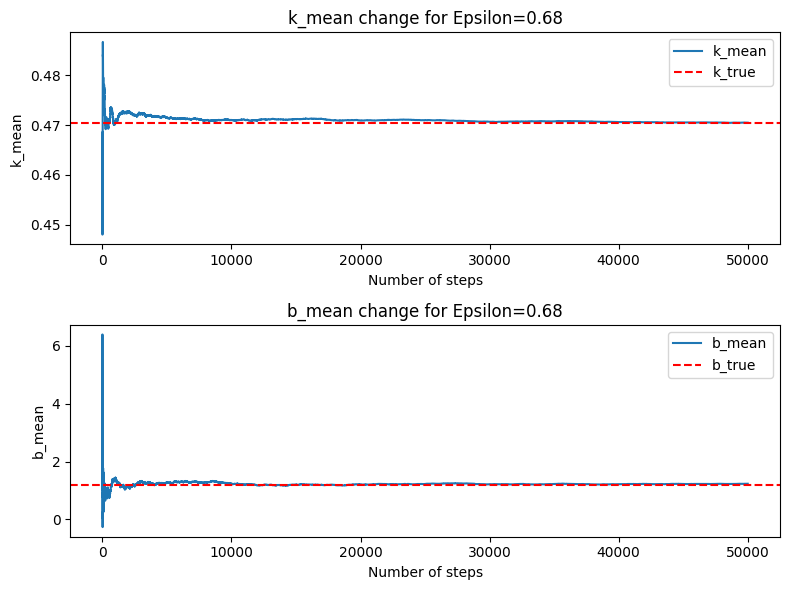

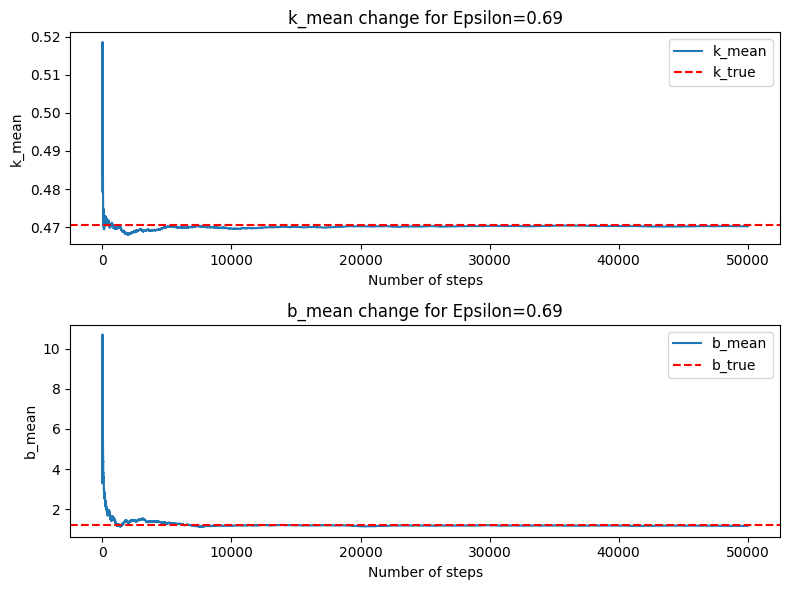

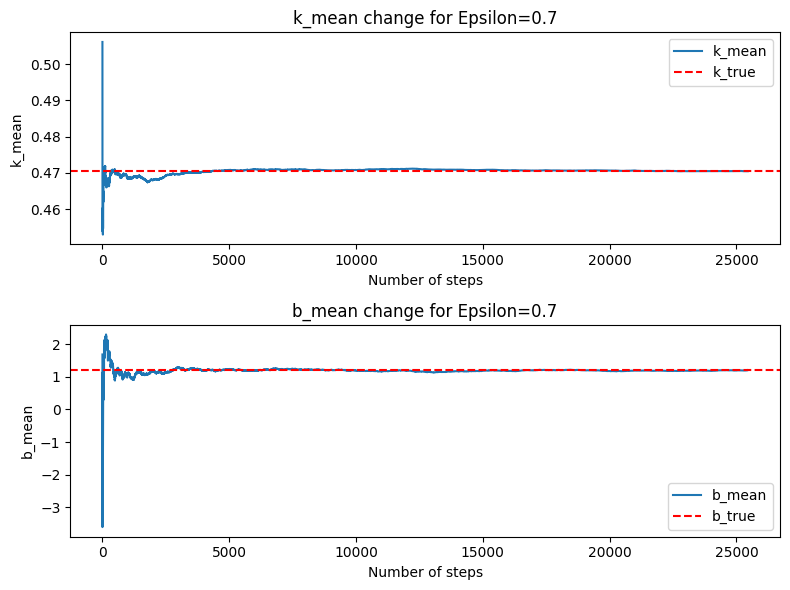

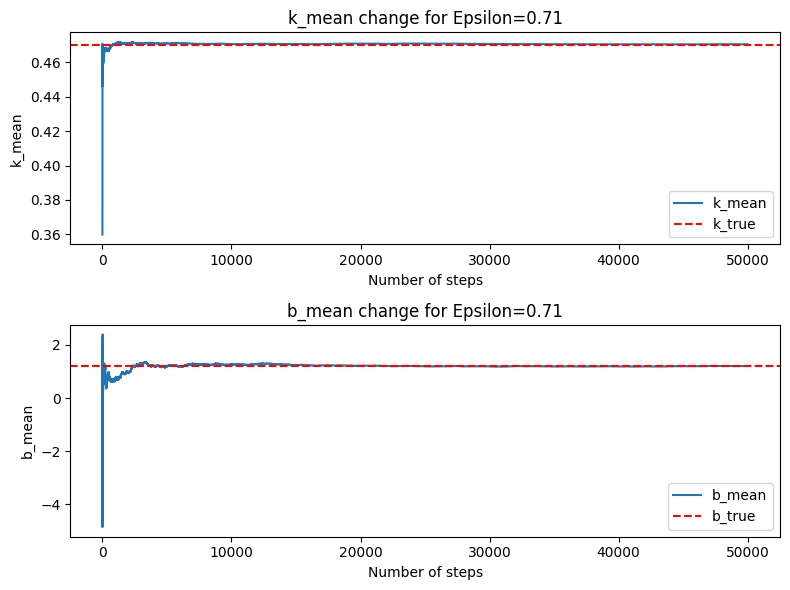

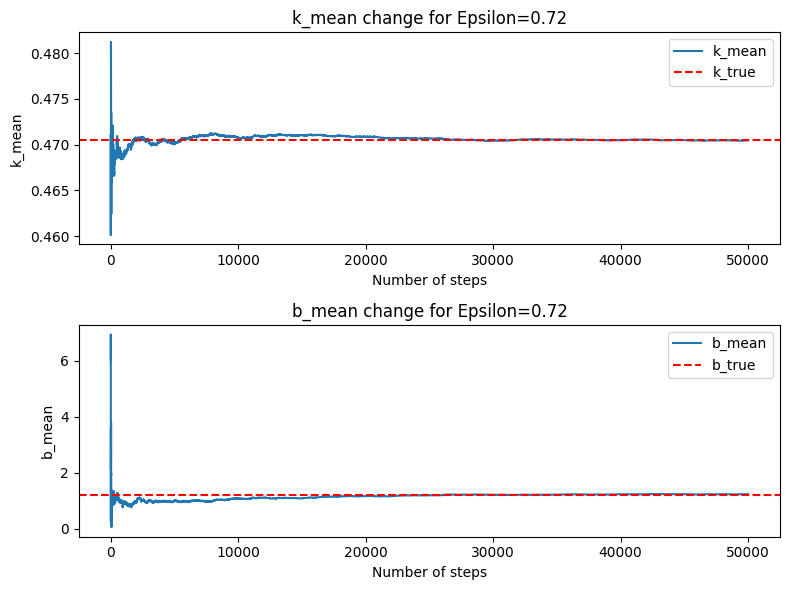

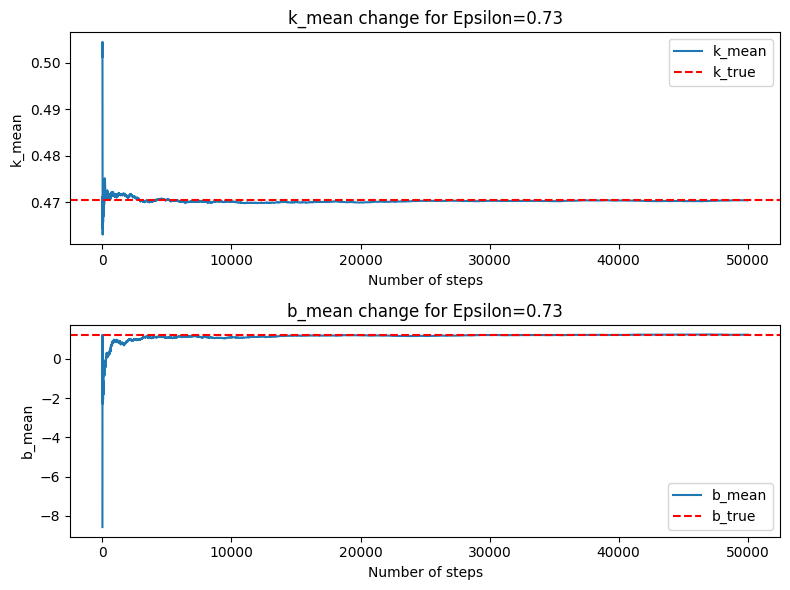

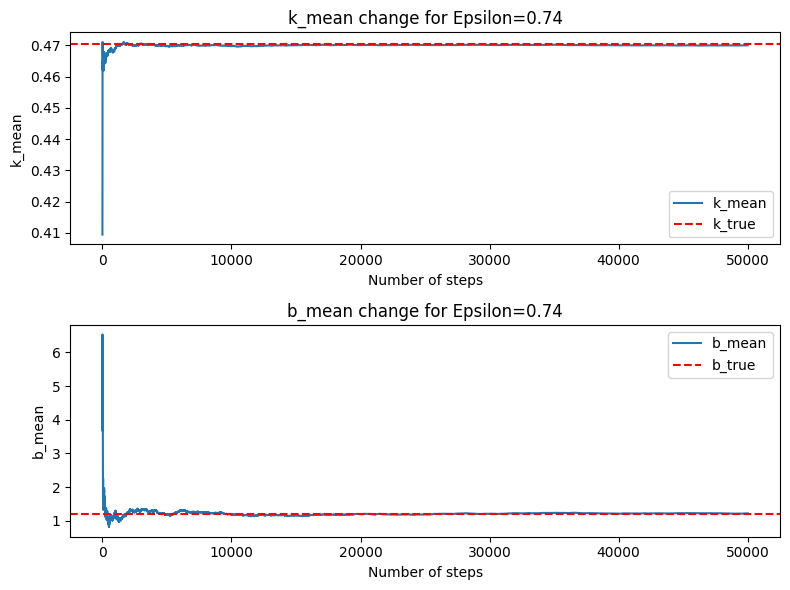

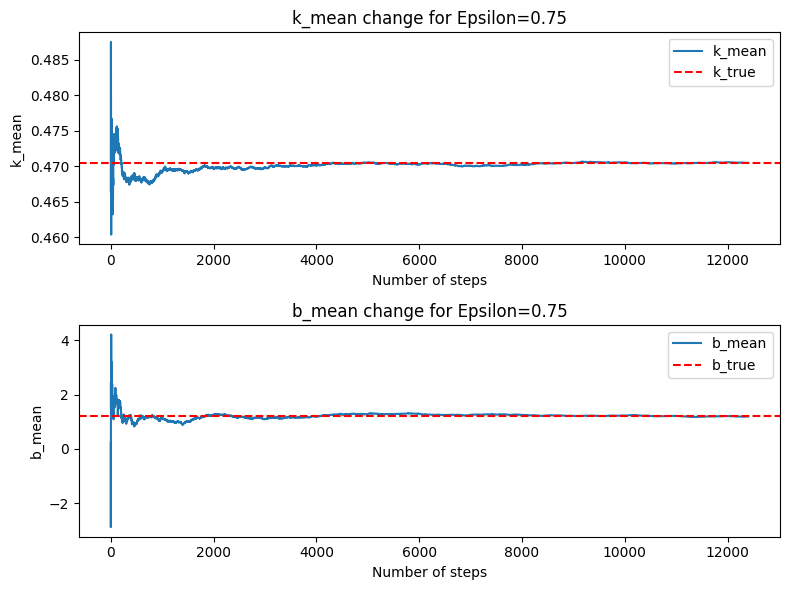

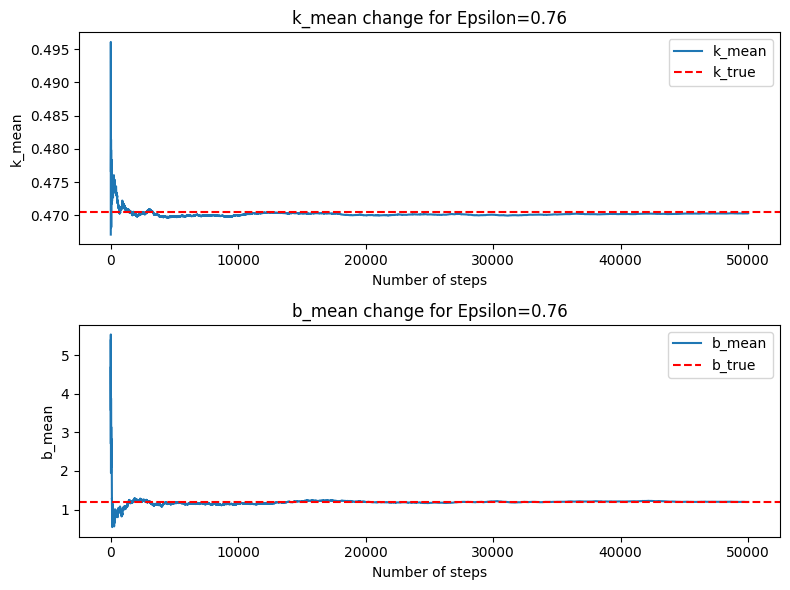

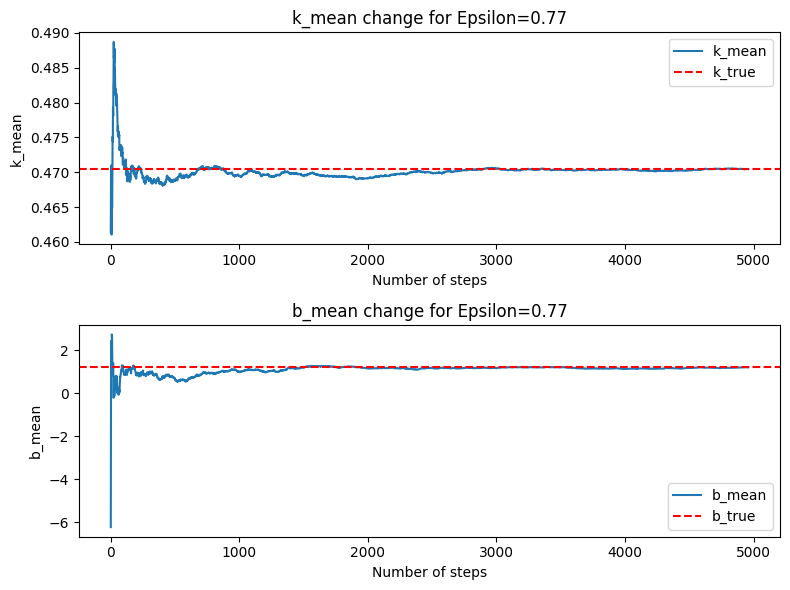

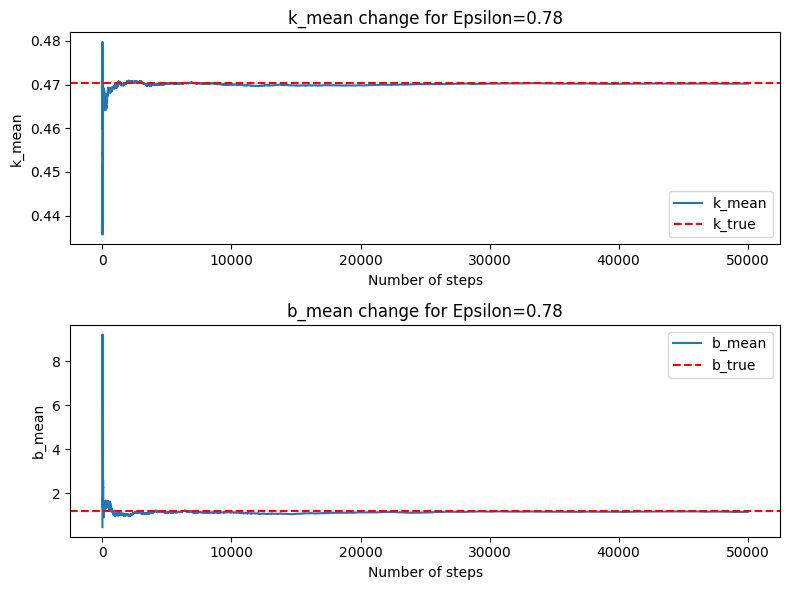

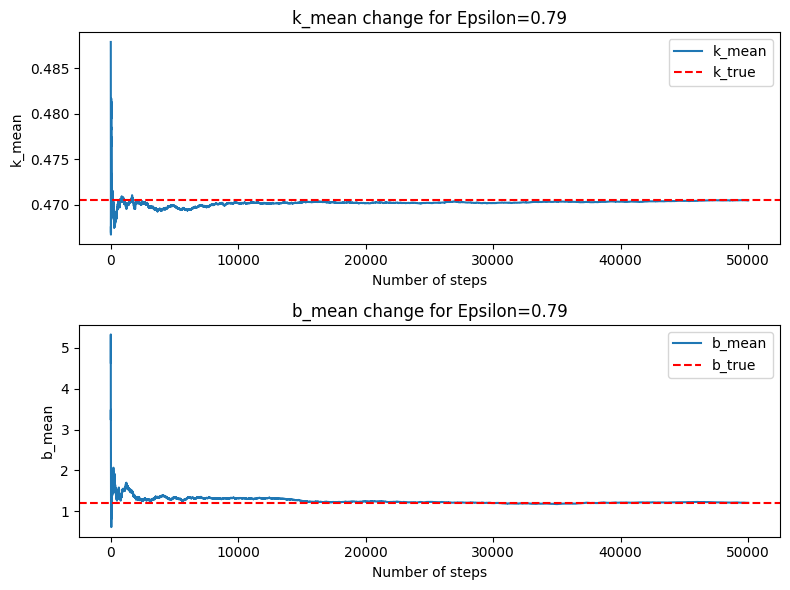

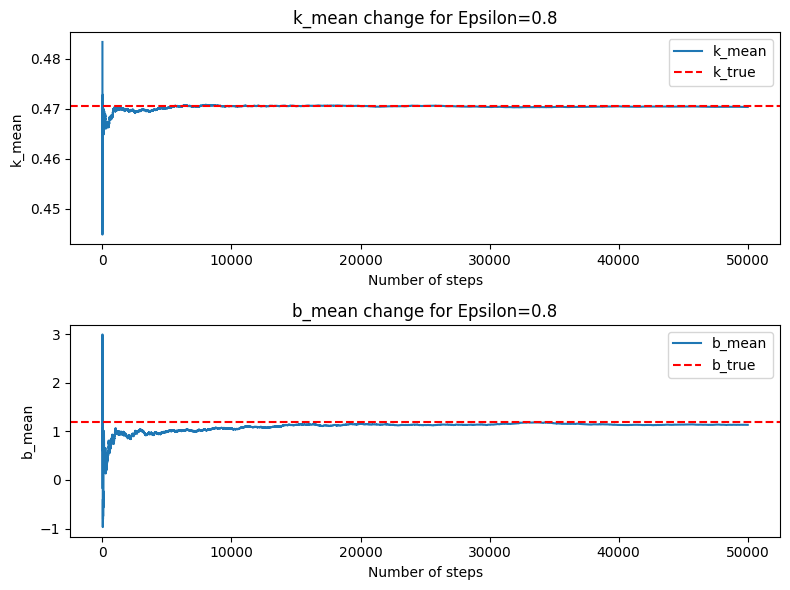

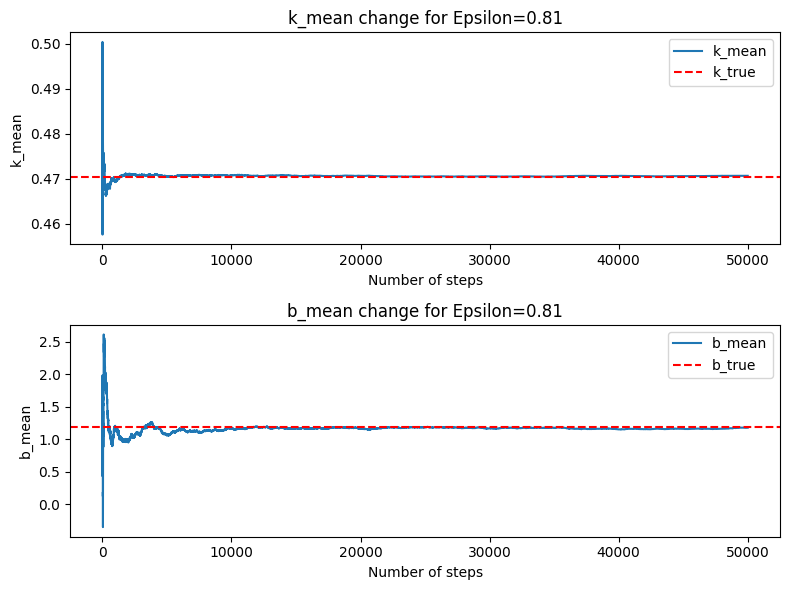

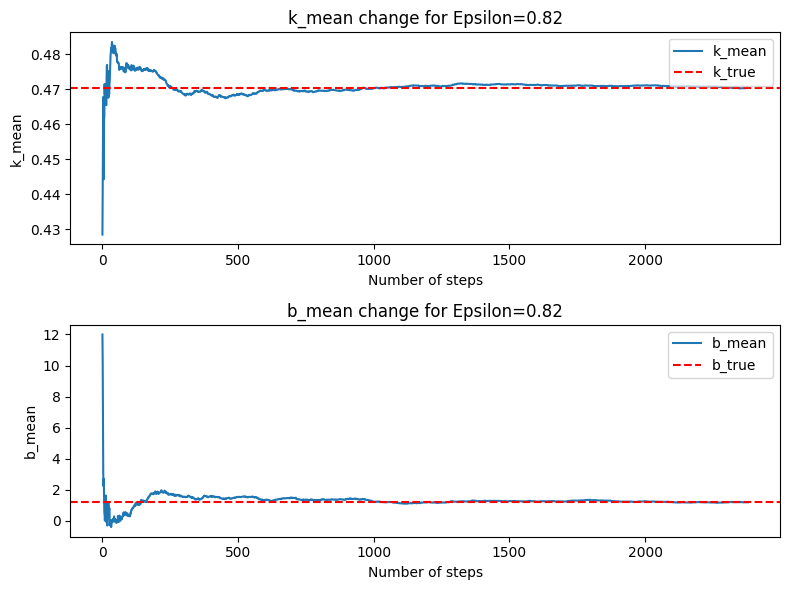

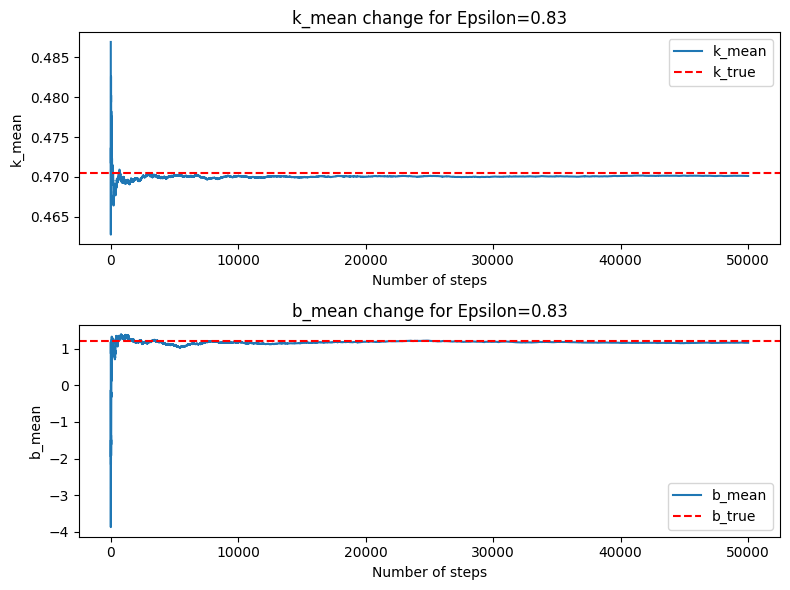

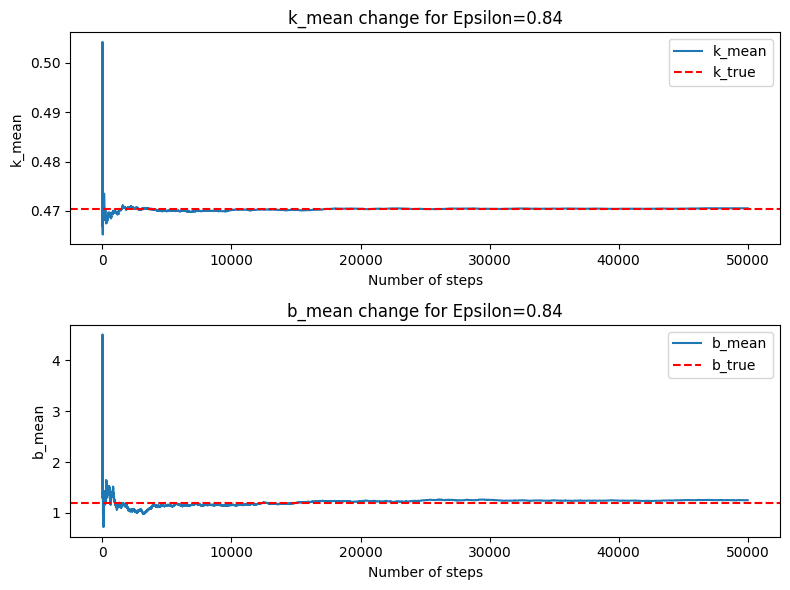

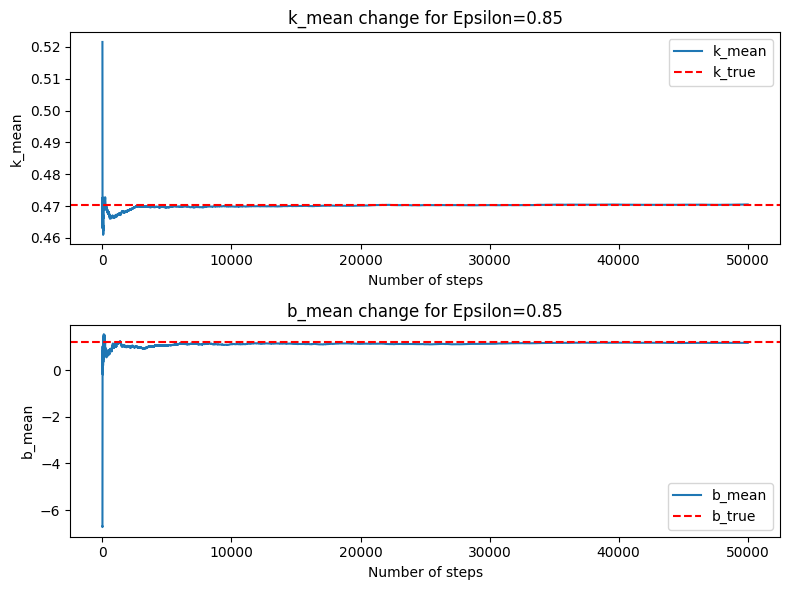

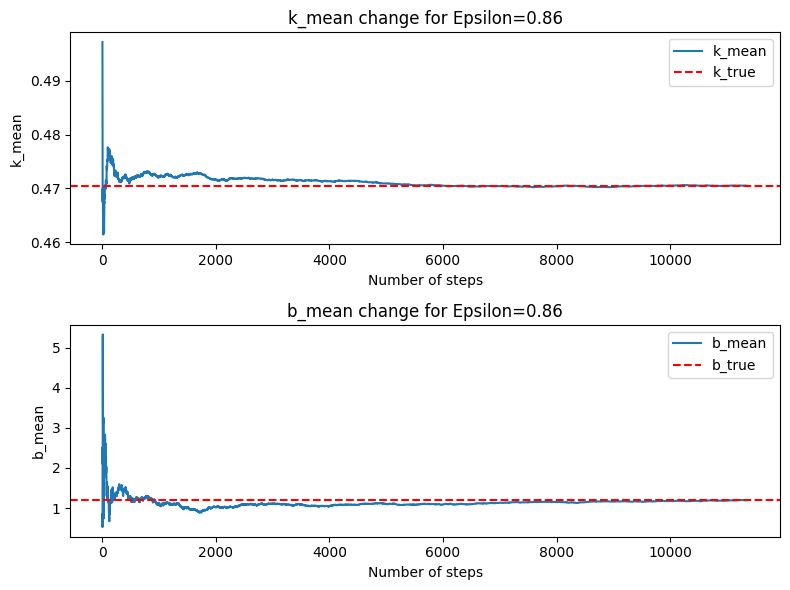

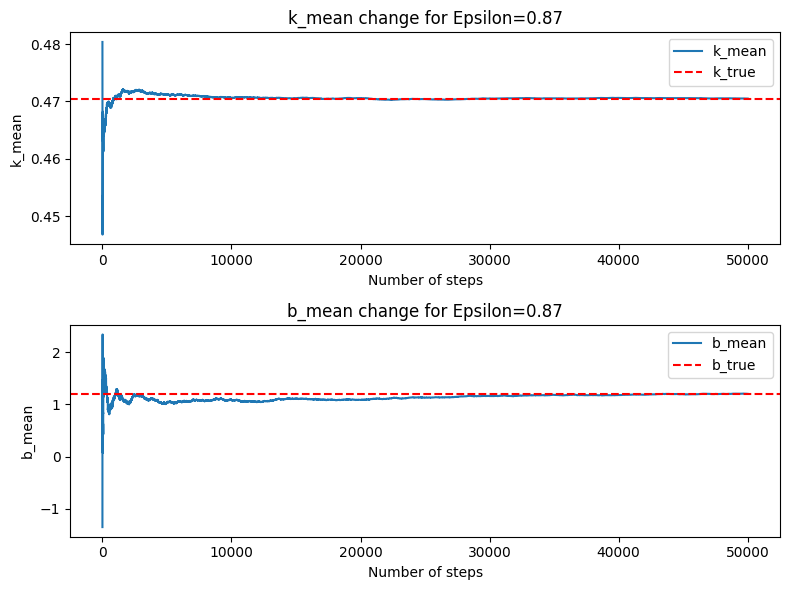

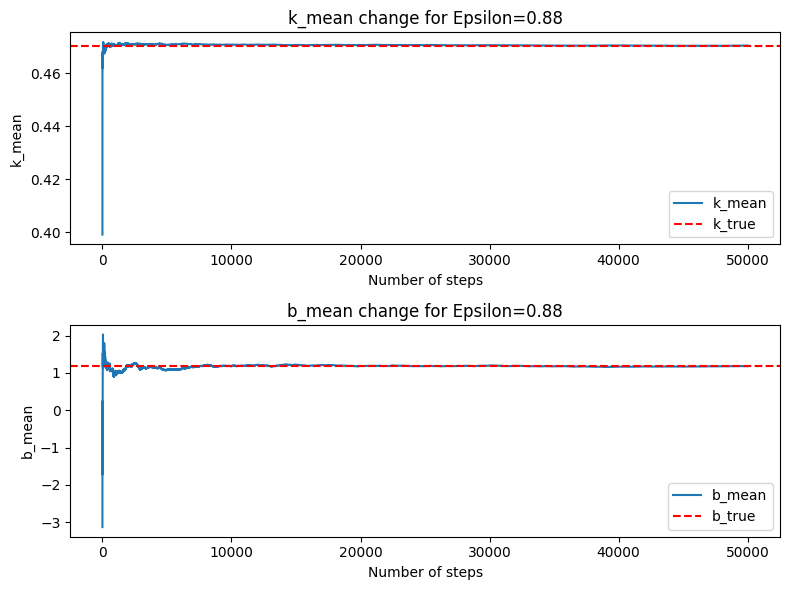

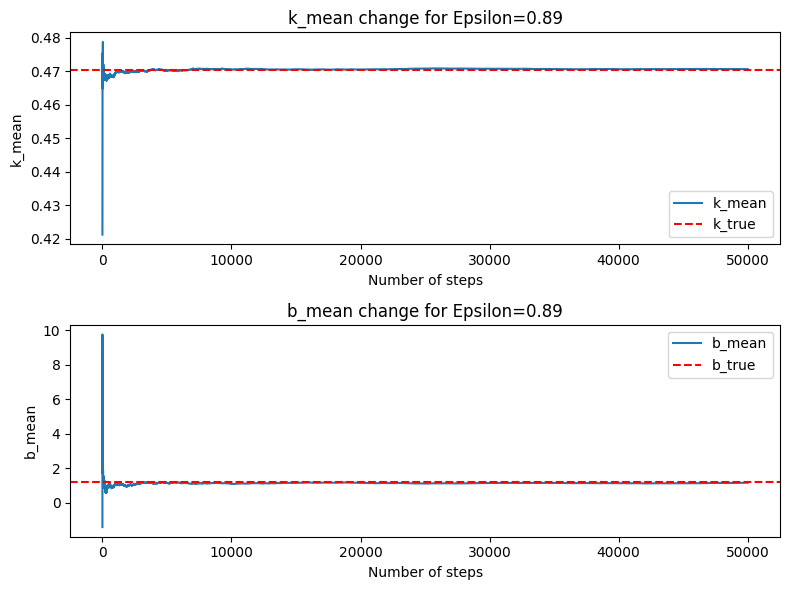

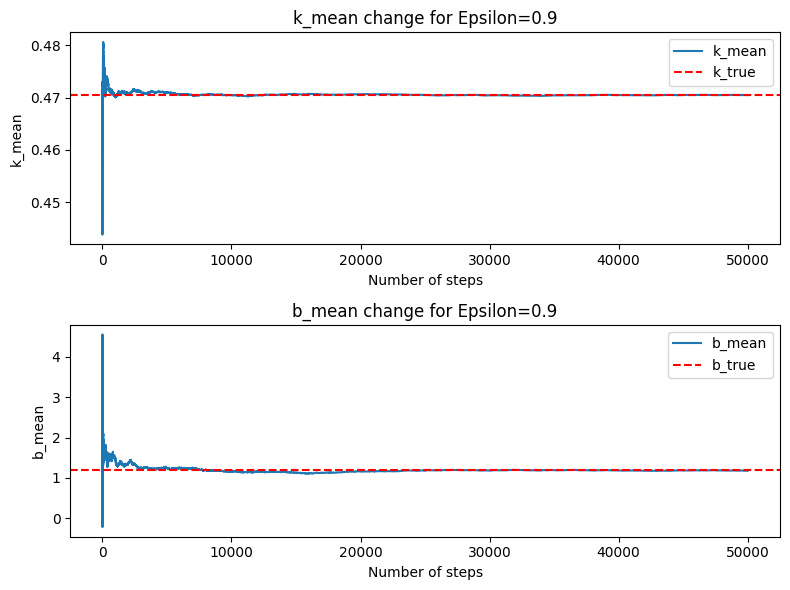

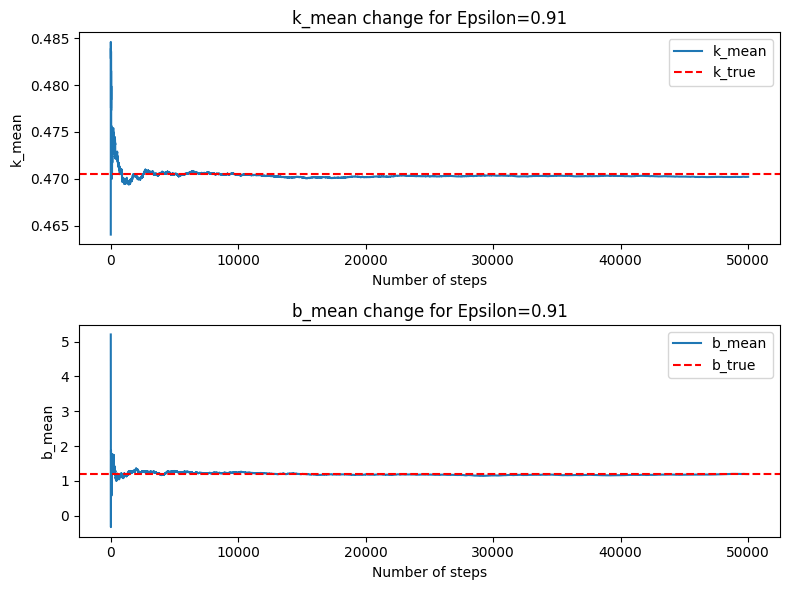

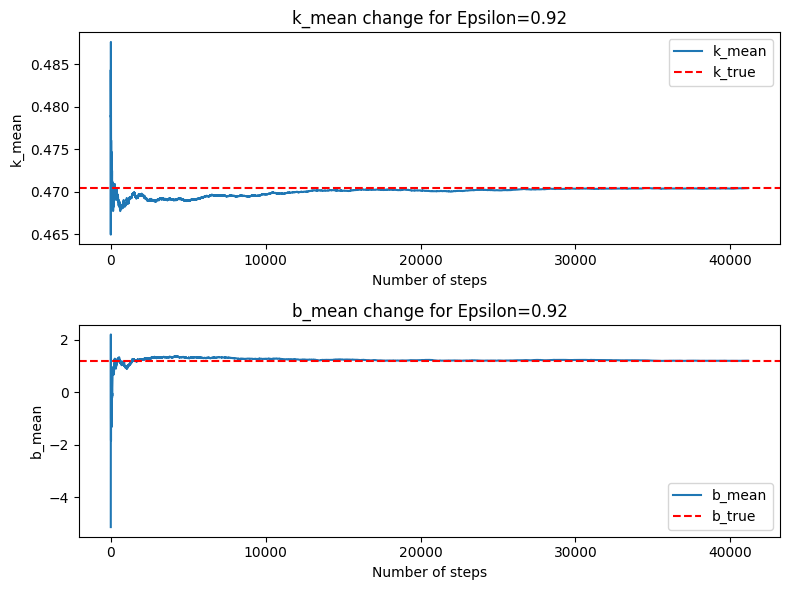

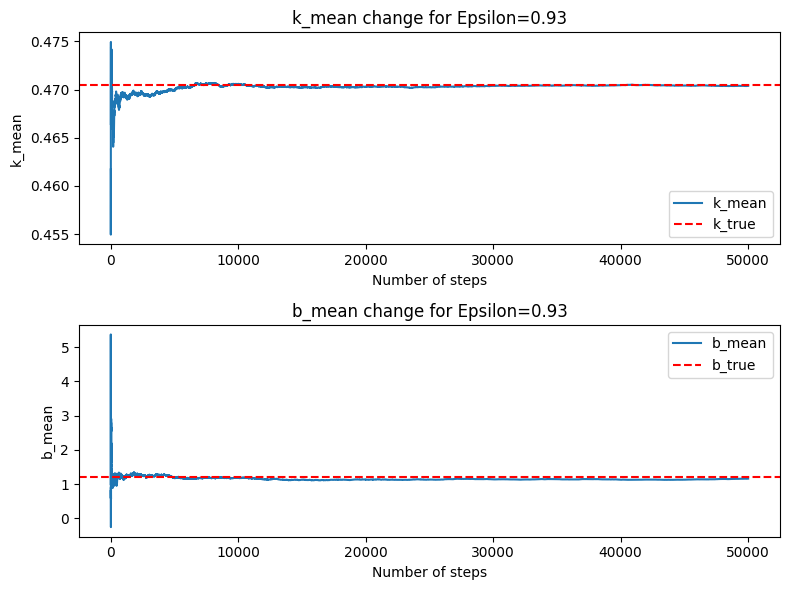

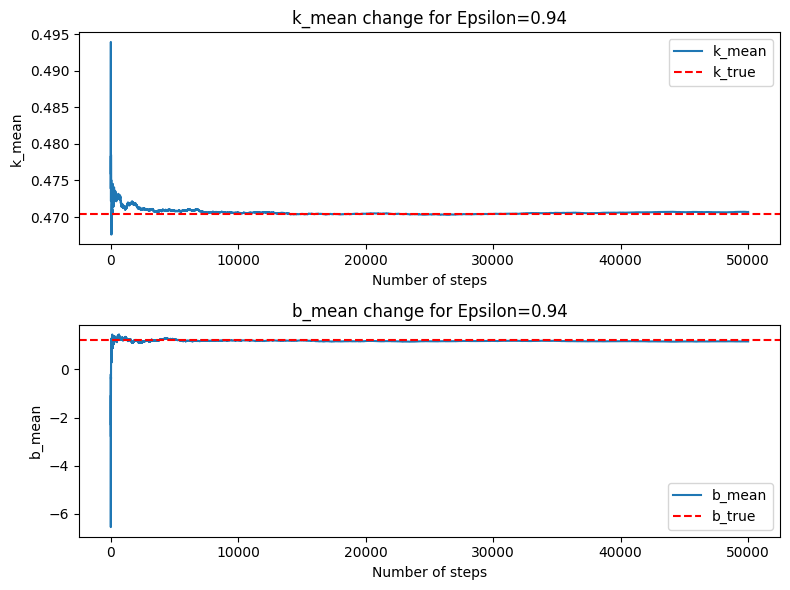

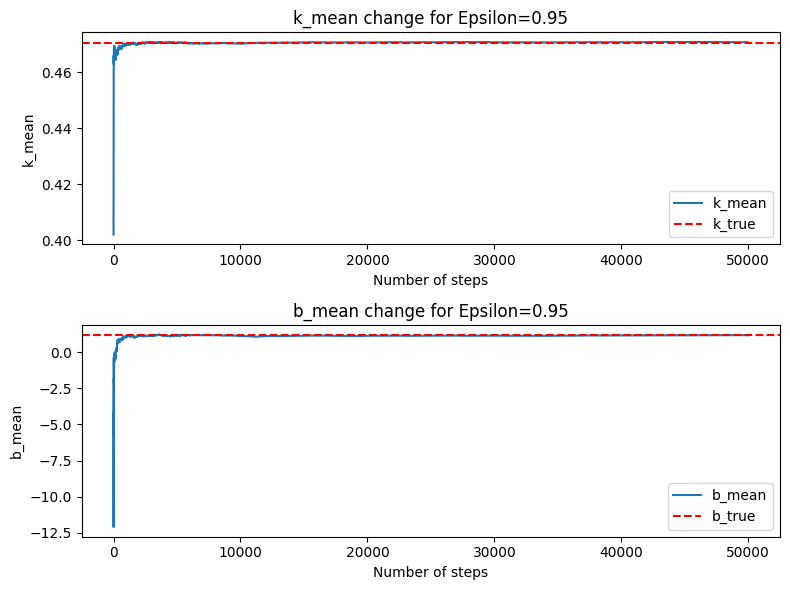

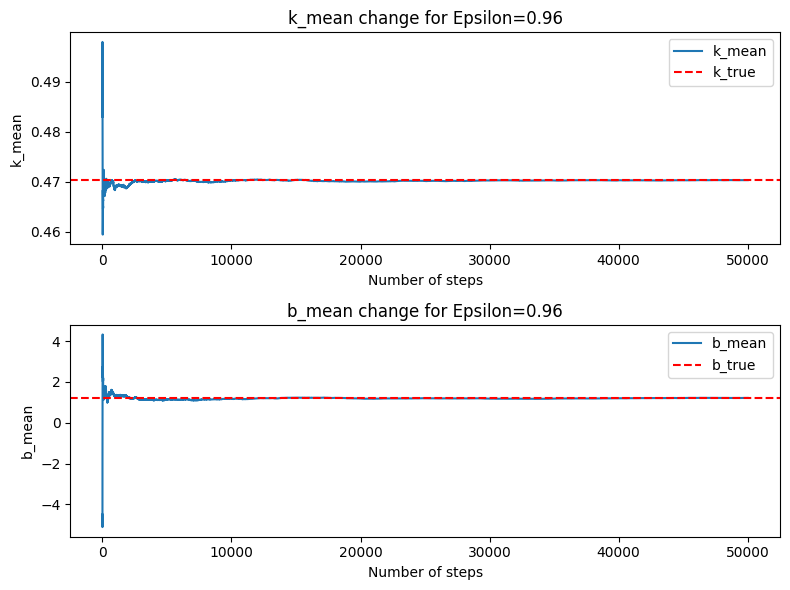

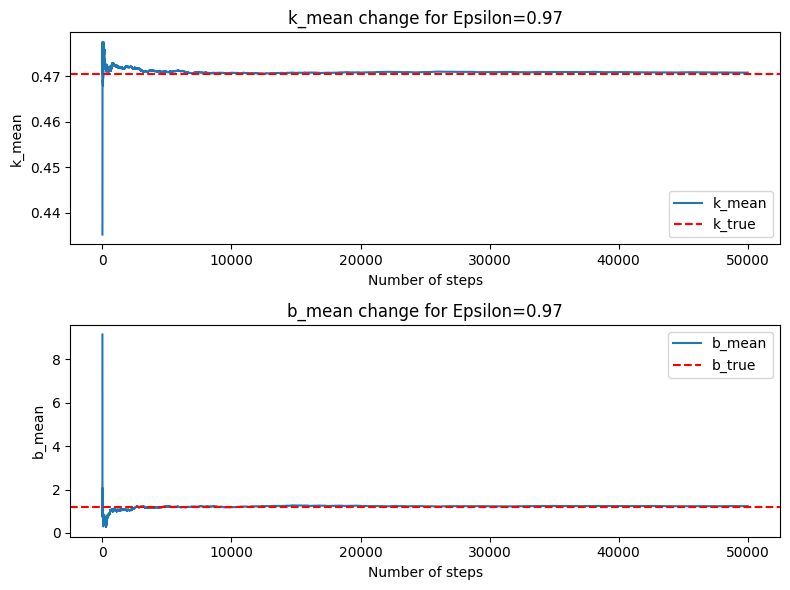

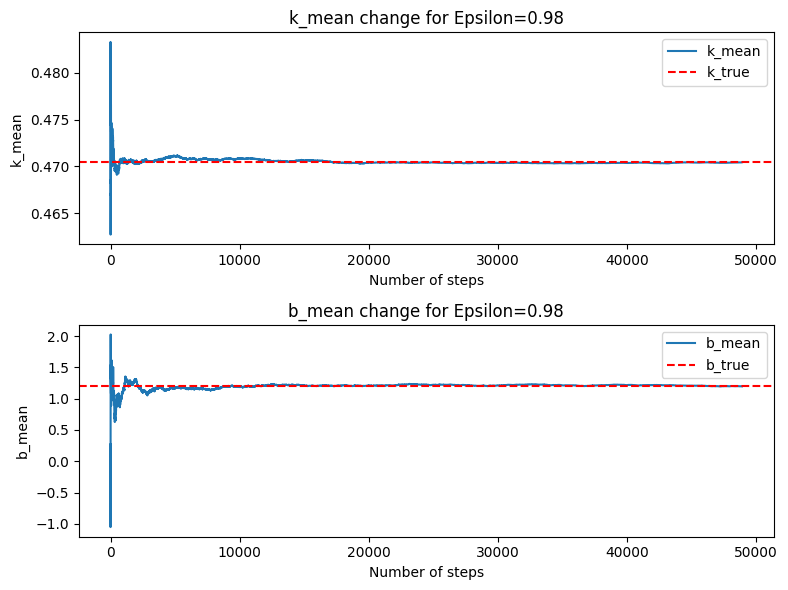

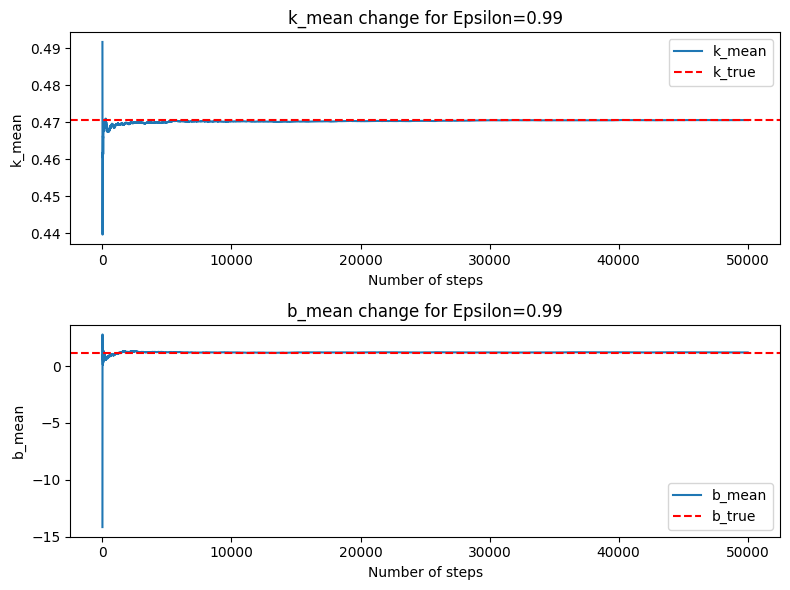

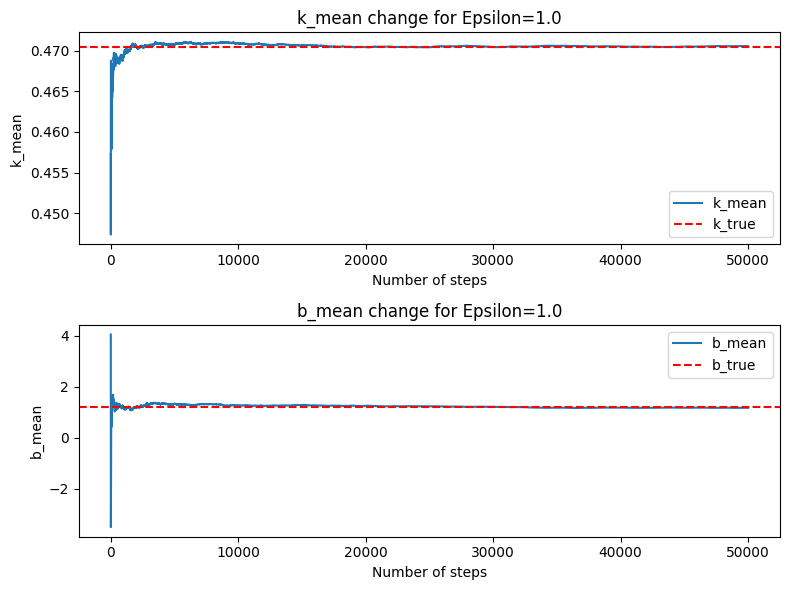

In [22]:
# Использование:
epsilon_start = 0.5
epsilon_end = 1.01
epsilon_step = 0.01
k_threshold = 0.00001
b_threshold = 0.0001

results = compare_steps(dataset, k_sens, b_sens, epsilon_start, epsilon_end, epsilon_step, k_threshold, b_threshold)

k_true, b_true = dataset.get_coefficients()

for epsilon, step_count, k_means, b_means in results:
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.plot(range(step_count), k_means, label='k_mean')
    plt.axhline(y=k_true, color='r', linestyle='--', label='k_true')
    plt.xlabel('Number of steps')
    plt.ylabel('k_mean')
    plt.title(f'k_mean change for Epsilon={round(epsilon, 2)}')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(range(step_count), b_means, label='b_mean')
    plt.axhline(y=b_true, color='r', linestyle='--', label='b_true')
    plt.xlabel('Number of steps')
    plt.ylabel('b_mean')
    plt.title(f'b_mean change for Epsilon={round(epsilon, 2)}')
    plt.legend()

    plt.tight_layout()
    plt.show()